# 라이브러리 로드

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 그래프 스타일
plt.style.use("ggplot")

# 운영체제에 맞는 폰트 불러오기
font_family = get_font_family()

# 폰트 설정
plt.rc("font", family= font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 데이터 로드

In [4]:
file_name = "upjong_no_35_2021-05-07_2.csv"

df = pd.read_csv(file_name, dtype={"종목코드":np.object})
df.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,현재_최고가,현재_최고가비율,목표주가,투자의견,매수매도,PER(배)_y,EPS(원)_y,PBR(배),BPS(원),배당수익률%
0,삼성제약,7070.0,1630.0,+29.96%,7070.0,0.0,20435374.0,135170.0,570986.0,2021-05-07,...,-6380.0,0.525651,NaN,NaN,NaN,NaN,-652.0,3.57,1982.0,NaN


In [5]:
# 전체 컬럼 출력 옵션
pd.options.display.max_columns = None

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   종목명          143 non-null    object 
 1   현재가          143 non-null    float64
 2   전일비          143 non-null    float64
 3   등락률          143 non-null    object 
 4   매수호가         143 non-null    float64
 5   매도호가         143 non-null    float64
 6   거래량          143 non-null    float64
 7   거래대금         143 non-null    float64
 8   전일거래량        143 non-null    float64
 9   조회일자         143 non-null    object 
 10  종목코드         143 non-null    object 
 11  매출액          21 non-null     float64
 12  영업이익         21 non-null     float64
 13  당기순이익        15 non-null     float64
 14  영업이익률        21 non-null     float64
 15  순이익률         15 non-null     float64
 16  EPS(원)_x     15 non-null     float64
 17  PER(배)_x     15 non-null     float64
 18  상장주식수        143 non-null    int64  
 19  외국인한도주식수

# 천단위 숫자 구분 함수 생성

In [7]:
def format_number(num) :
    """
    천단위 숫자를 구분해 주는 문자 삽입 함수
    """
    if type(num) != str:
        return format(num,",")
    else:
        return num

In [8]:
# 함수 테스트
format_number("123456")

'123456'

In [9]:
# 함수 테스트
format_number(123456)

'123,456'

In [10]:
# 타입확인
df[["상장주식수","거래량"]].dtypes

상장주식수      int64
거래량      float64
dtype: object

In [11]:
df[["종목코드","상장주식수","거래량"]].style.format(format_number) # 종목코드는 문자형이라 , 삽입이 안됨

,종목코드,상장주식수,거래량
0,001360,"67,030,949","20,435,374.0"
1,019175,"2,200,000","48,886.0"
2,068270,"137,703,428","1,286,288.0"
3,069620,"11,586,575","335,356.0"
4,008930,"67,304,611","264,873.0"
5,091990,"154,974,355","1,390,012.0"
6,204840,"47,210,219","685,973.0"
7,183490,"8,331,345","319,156.0"
8,003090,"58,141,980","901,196.0"
9,007575,"445,080","14,750.0"


# EPS(원) 전처리

In [12]:
df.filter(regex = "EPS\(원\)", axis=1)

,EPS(원)_x,EPS(원)_y
0,NaN,-652.0
1,NaN,91.0
2,1110.0,3717.0
3,NaN,1101.0
4,NaN,336.0
...,...,...
138,NaN,-293.0
139,NaN,-1367.0
140,46.0,-587.0
141,NaN,-730.0


In [13]:
df["EPS(원)"] = df["EPS(원)_y"].fillna(df["EPS(원)_x"]) # EPS_Y가 결측치라면 EPS_X로 채움
df.filter(regex = "EPS\(원\)", axis=1)

,EPS(원)_x,EPS(원)_y,EPS(원)
0,NaN,-652.0,-652.0
1,NaN,91.0,91.0
2,1110.0,3717.0,3717.0
3,NaN,1101.0,1101.0
4,NaN,336.0,336.0
...,...,...,...
138,NaN,-293.0,-293.0
139,NaN,-1367.0,-1367.0
140,46.0,-587.0,-587.0
141,NaN,-730.0,-730.0


In [14]:
# 사용하지 않는 칼럼 삭제
del df["EPS(원)_x"]
del df["EPS(원)_y"]

In [15]:
df.filter(regex="EPS\(원\)", axis=1)

,EPS(원)
0,-652.0
1,91.0
2,3717.0
3,1101.0
4,336.0
...,...
138,-293.0
139,-1367.0
140,-587.0
141,-730.0


# PER(배) 전처리

In [16]:
df.filter(regex= "PER\(배\)", axis=1)

,PER(배)_x,PER(배)_y
0,NaN,NaN
1,NaN,796.70
2,227.39,71.70
3,NaN,130.34
4,NaN,208.63
...,...,...
138,NaN,NaN
139,NaN,NaN
140,224.74,NaN
141,NaN,NaN


In [17]:
df["PER(배)"] = df["PER(배)_y"].fillna(df["PER(배)_x"])
df.filter(regex= "PER\(배\)", axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PER(배)_x  15 non-null     float64
 1   PER(배)_y  84 non-null     float64
 2   PER(배)    85 non-null     float64
dtypes: float64(3)
memory usage: 3.5 KB


In [18]:
del df["PER(배)_y"]
del df["PER(배)_x"]

In [19]:
df.filter(regex= "PER\(배\)", axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PER(배)  85 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


# BPS(원)

In [20]:
df.filter(regex = "BPS\(원\)", axis=1).info() # BPS은 그냥 하나 값만 존재함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPS(원)  141 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


# PBR(배) 

In [21]:
df.filter(regex="PBR\(배\)", axis=1).info() # PBR도 칼럼이 하나만 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PBR(배)  140 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


# 일부 칼럼만 사용

In [22]:
df.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '매출액', '영업이익', '당기순이익', '영업이익률', '순이익률', '상장주식수',
       '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)', '동일업종 PER', '동일업종 등락률',
       '코스피/코스닥', '시가총액(억원)', '시가총액순위(전처리)', '52주최고', '52주최저', '52주차액',
       '52주차액비율', '현재_최고가', '현재_최고가비율', '목표주가', '투자의견', '매수매도', 'PBR(배)',
       'BPS(원)', '배당수익률%', 'EPS(원)', 'PER(배)'],
      dtype='object')

In [23]:
cols = ['조회일자', '종목명', '종목코드', '52주차액비율', '거래대금', '거래량', 
        '배당수익률%', '목표주가', '상장주식수', '시가총액(억원)', '시가총액순위(전처리)', 
        '투자의견', '매수매도', '현재_최고가', '현재_최고가비율', '현재가', 
        'PER(배)', 'EPS(원)', 'PBR(배)', 'BPS(원)']

# PER 상하위 10개 종목 

In [31]:
# 하위 10개 종목
per_low = df[cols].sort_values(by=["PBR(배)"]).head(10)

In [32]:
per_low.set_index("종목명")["PER(배)"]

종목명
씨케이에이치 *          NaN
일성신약            73.58
코스맥스비티아이          NaN
삼아제약 *         815.79
에이프로젠 H&G *     11.98
테라젠이텍스 *          NaN
광동제약            10.47
동아쏘시오홀딩스         4.67
에이프로젠제약         33.57
제일파마홀딩스         34.99
Name: PER(배), dtype: float64

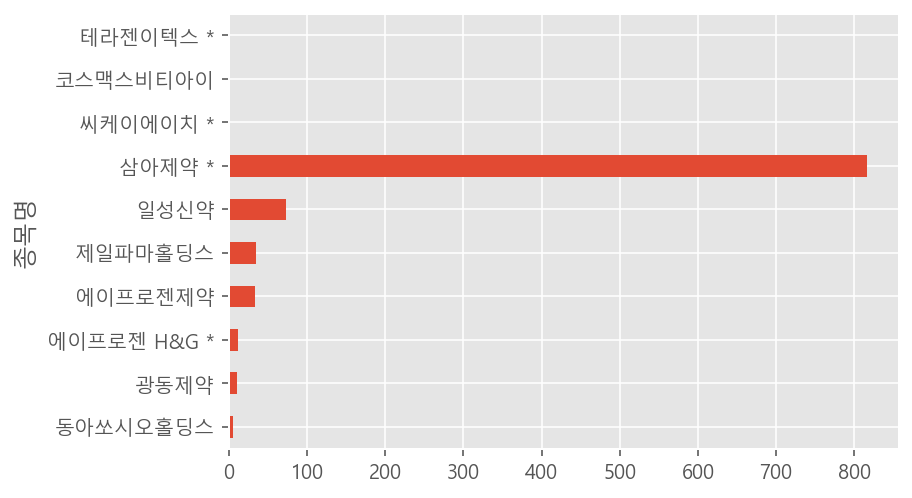

In [33]:
# 막대그래프 시각화
per_low.set_index("종목명")["PER(배)"].sort_values().plot.barh()

In [28]:
# 상위 10개 종목
per_high = df[cols].sort_values("PER(배)", ascending=False).head(10)

In [29]:
per_high.set_index("종목명")["PER(배)"].sort_values()

종목명
코스맥스엔비티 *     224.74
셀트리온제약 *      230.02
SK바이오사이언스     298.88
한미약품          343.94
신신제약 *        345.42
유유제약2우B       365.85
신풍제약          706.59
신풍제약우         796.70
삼아제약 *        815.79
CMG제약 *      2237.50
Name: PER(배), dtype: float64

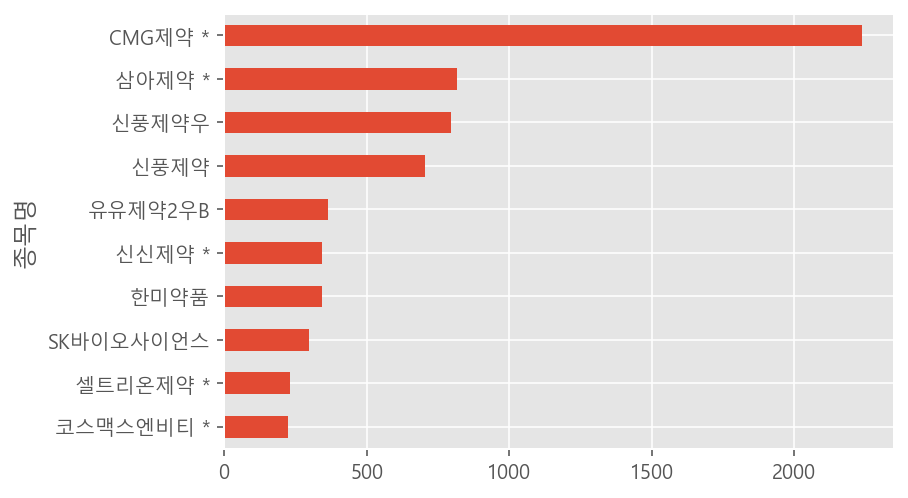

In [30]:
per_high.set_index("종목명")["PER(배)"].sort_values().plot.barh()

# PBR 상하위 10개 종목

In [34]:
# 하위 10개 종목
pbr_low = df[cols].sort_values(by="PBR(배)").head(10)

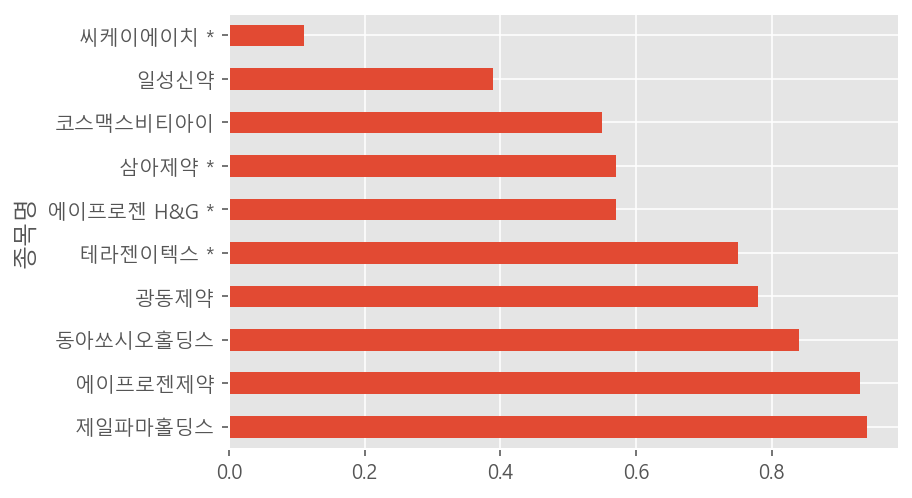

In [35]:
pbr_low.set_index("종목명")["PBR(배)"].sort_values(ascending=False).plot.barh()

In [36]:
# 상위 10개 종목
pbr_high = df[cols].sort_values(by="PBR(배)", ascending=False).head(10)

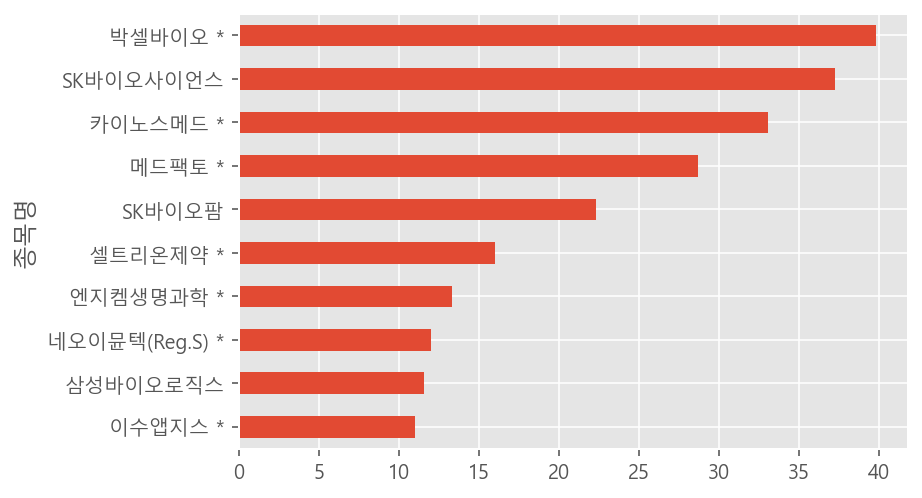

In [37]:
pbr_high.set_index("종목명")["PBR(배)"].sort_values().plot.barh()

# PER과 PBR의 상관분석

In [38]:
# 상관계수
df[["PER(배)","PBR(배)"]].corr() # 아주 약한 상관관계

,PER(배),PBR(배)
PER(배),1.000000,0.197477
PBR(배),0.197477,1.000000


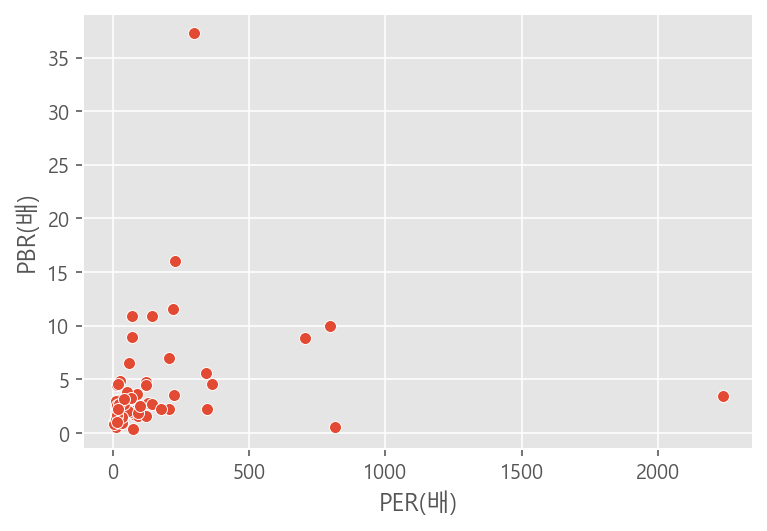

In [41]:
sns.scatterplot(data=df,x="PER(배)", y="PBR(배)")

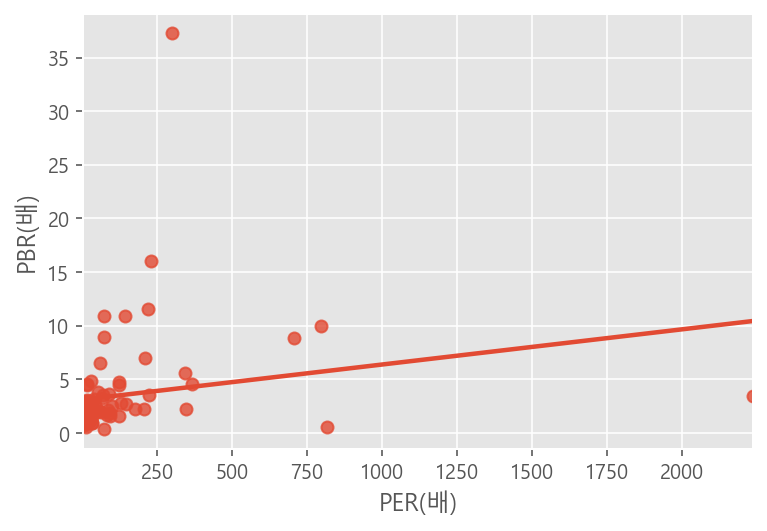

In [43]:
# regplot으로 선형성 확인
sns.regplot(data=df,x="PER(배)", y="PBR(배)", ci=None)

## 이상치 찾기

In [44]:
# PER 이상치
df["PER(배)"].describe()

count      85.000000
mean      120.100471
std       278.891764
min         4.670000
25%        17.650000
50%        33.330000
75%        93.950000
max      2237.500000
Name: PER(배), dtype: float64

In [46]:
df.loc[df["PER(배)"] > 2000, cols]

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률%,목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재_최고가,현재_최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
79,2021-05-07,CMG제약 *,058820,1.818182,2908.0,648467.0,NaN,NaN,138892244,6215,126,NaN,NaN,-2625.0,0.630282,4475.0,2237.5,2.0,3.43,1304.0


In [47]:
# PBR 이상치
df["PBR(배)"].describe()

count    140.000000
mean       4.622643
std        6.206681
min        0.110000
25%        1.697500
50%        2.695000
75%        4.747500
max       39.840000
Name: PBR(배), dtype: float64

In [48]:
df.loc[df["PBR(배)"]>30, cols]

,조회일자,종목명,종목코드,52주차액비율,거래대금,거래량,배당수익률%,목표주가,상장주식수,시가총액(억원),시가총액순위(전처리),투자의견,매수매도,현재_최고가,현재_최고가비율,현재가,PER(배),EPS(원),PBR(배),BPS(원)
97,2021-05-07,SK바이오사이언스,302440,1.704036,91573.0,575780.0,NaN,NaN,76500000,122782,31,NaN,NaN,-29500.0,0.844737,160500.0,298.88,537.0,37.24,4310.0
112,2021-05-07,카이노스메드 *,284620,2.170968,1217.0,311372.0,NaN,NaN,105242808,4104,219,NaN,NaN,-2830.0,0.579495,3900.0,NaN,-110.0,33.05,118.0
138,2021-05-07,박셀바이오 *,323990,29.310513,41895.0,446117.0,NaN,NaN,15223000,13975,36,NaN,NaN,-207900.0,0.306306,91800.0,NaN,-293.0,39.84,2304.0


# 배당수익률이 높은 종목 

In [49]:
df["배당수익률%"]

0       NaN
1      0.16
2       NaN
3      0.42
4      0.28
       ... 
138     NaN
139     NaN
140     NaN
141     NaN
142     NaN
Name: 배당수익률%, Length: 143, dtype: float64

In [55]:
# 배당수익률 컬럼이 결측치가 아닌 데이터 중 높은 종목
배당수익률 = df[df["배당수익률%"].notnull()].sort_values(by="배당수익률%", ascending=False).head(10)

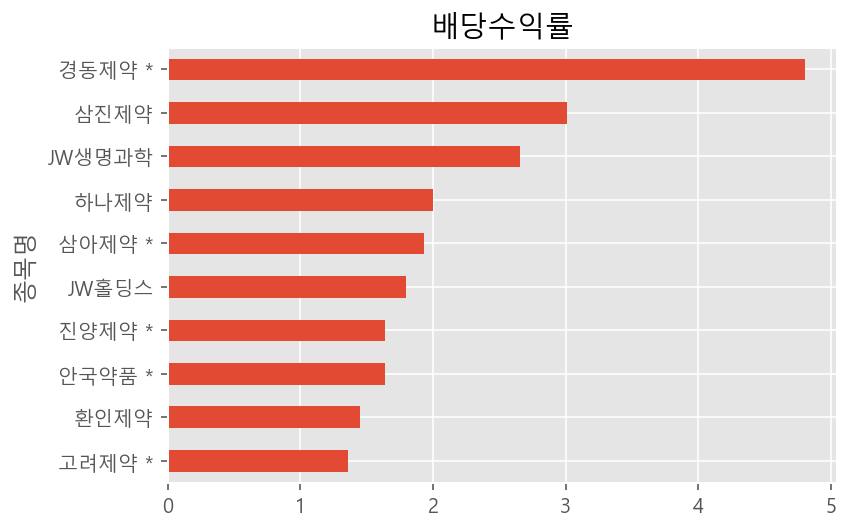

In [60]:
a= 배당수익률.set_index("종목명")["배당수익률%"].sort_values().plot.barh(title="배당수익률")

# 코스피에서 해당 업종/테마 시가총액이 가장 많은 종목

In [68]:
kospi = (df["코스피/코스닥"] == "코스피")

In [71]:
# 시가총액이 가장 많은 종목
시가총액 = df[kospi].sort_values(by="시가총액(억원)", ascending=False).head(10)

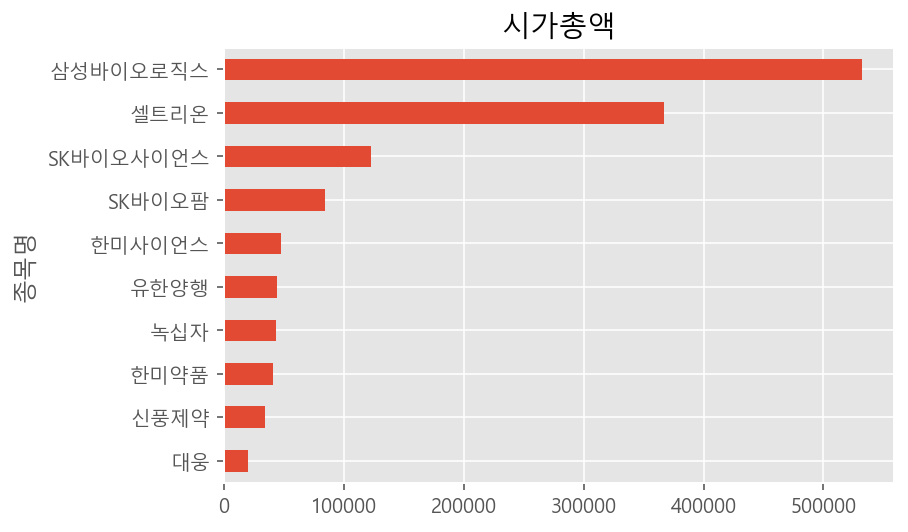

In [73]:
시가총액.set_index("종목명")["시가총액(억원)"].sort_values().plot.barh(title="시가총액")

# 코스피에서 해당 업종/테마의 거래량이 가장 많은 종목

In [74]:
kospi = (df["코스피/코스닥"] == "코스피")

In [75]:
거래량 = df[kospi].sort_values(by="거래량", ascending=False).head(10)

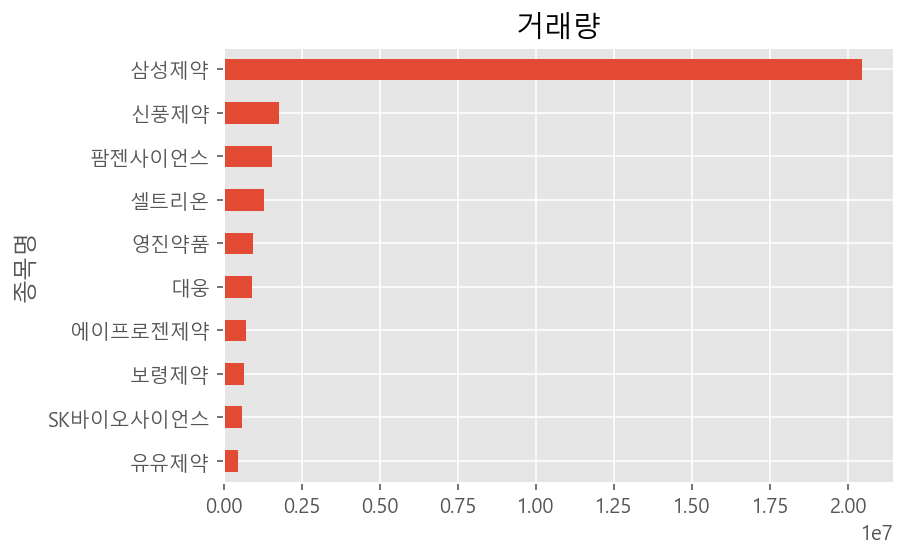

In [76]:
거래량.set_index("종목명")["거래량"].sort_values().plot.barh(title="거래량")

# 코스피 해당 업종/테마 종목중 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목

In [83]:
df_high_current = df[kospi].sort_values(["현재_최고가비율"]).head(10) # 값이 작을수록 손실이 크다

In [84]:
df_high_current.set_index("종목명")["현재_최고가비율"]

종목명
일양약품우       0.238922
신풍제약우       0.258929
신풍제약        0.300467
녹십자홀딩스2우    0.343206
일양약품        0.345070
제일약품        0.360504
팜젠사이언스      0.374443
JW중외제약우     0.379629
대웅          0.394464
SK바이오팜      0.400742
Name: 현재_최고가비율, dtype: float64

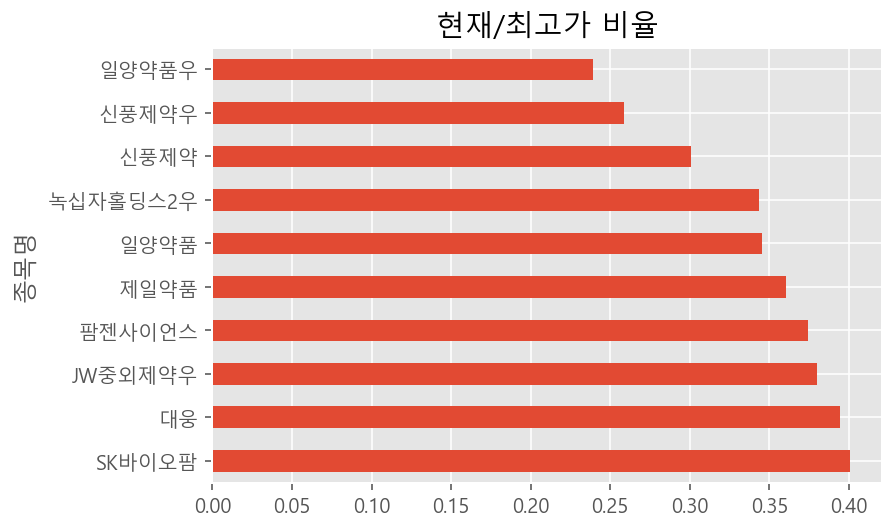

In [86]:
df_high_current.set_index("종목명")["현재_최고가비율"].sort_values(ascending=False).plot.barh(title="현재/최고가 비율")

# 코스피 해당 업종/테마 종목중 최근 52주 차액 비율이 가장 높은 종목

In [87]:
df["52주차액비율"]

0       4.002976
1       8.115942
2       1.982811
3       3.248299
4       3.884979
         ...    
138    29.310513
139     2.188841
140     2.489224
141     4.385965
142     5.436187
Name: 52주차액비율, Length: 143, dtype: float64

In [88]:
df_52_delta = df.sort_values(by=["52주차액비율"], ascending=False).head(10)

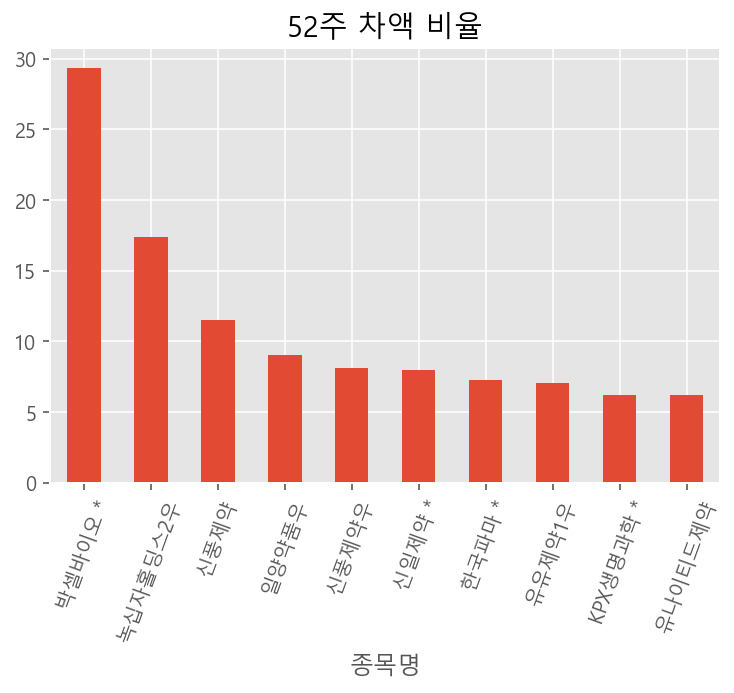

In [89]:
# 종목명에 대한 52주차액비율을 시각화 
df_52_delta.set_index("종목명")["52주차액비율"].plot.bar(rot=70, title="52주 차액 비율")

# 최대 손실 낙폭

In [90]:
df["MDD"] = (df["52주최저"] - df["52주최고"]) / df["52주최고"]

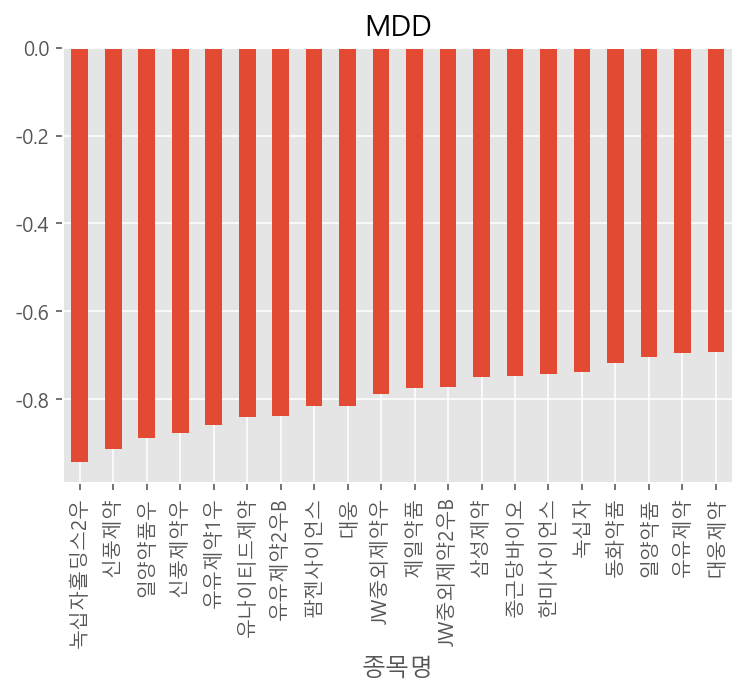

In [91]:
df[kospi].sort_values(by=["MDD"]).set_index("종목명")["MDD"].head(20).plot.bar(title="MDD")

# 코스피 해당 업종/테마에서 거래대금이 20위 안에 있는 코스피 종목 중에 "PER(배)"가 가장 높은 종목

In [93]:
kospi_20 = df[kospi].sort_values("거래대금", ascending=False).head(20)
kospi_20_per = kospi_20.sort_values("PER(배)", ascending=False)

In [94]:
kospi_20_per[["종목명","거래대금","PER(배)"]].set_index("종목명")

,거래대금,PER(배)
종목명,,
신풍제약,113836.0,706.59
한미약품,17857.0,343.94
SK바이오사이언스,91573.0,298.88
삼성바이오로직스,156576.0,220.76
한미사이언스,18453.0,208.63
대웅제약,49097.0,130.34
셀트리온,340116.0,71.70
일양약품,17052.0,65.98
종근당바이오,15630.0,56.45


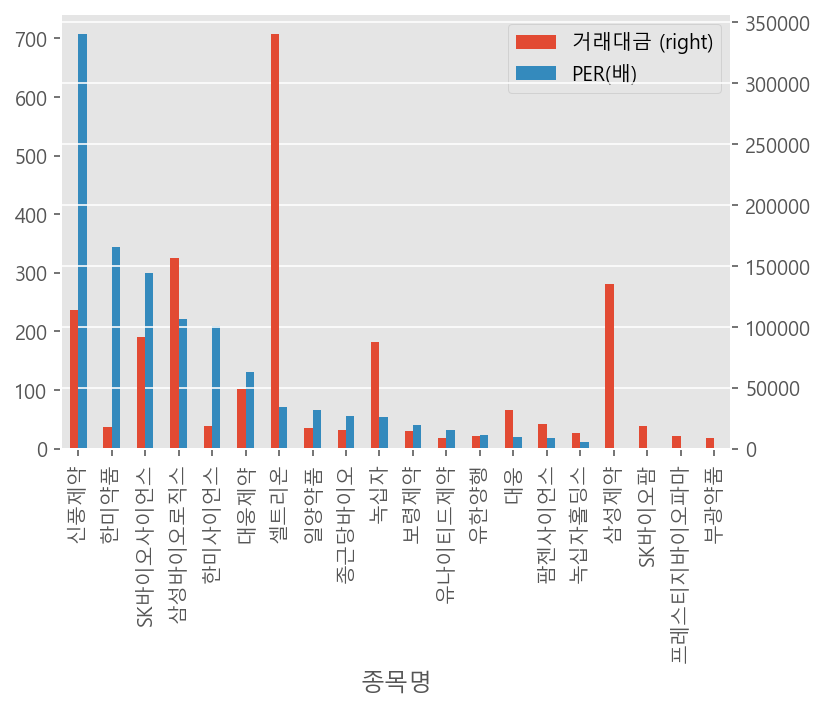

In [97]:
kospi_20_per[["종목명","거래대금","PER(배)"]].set_index("종목명").plot.bar(secondary_y="거래대금")

# 코스피 해당 업종/테마에서 거래대금이 20위 안에 있는 코스피 종목 중에 "PER(배)"가 가장 낮은 종목

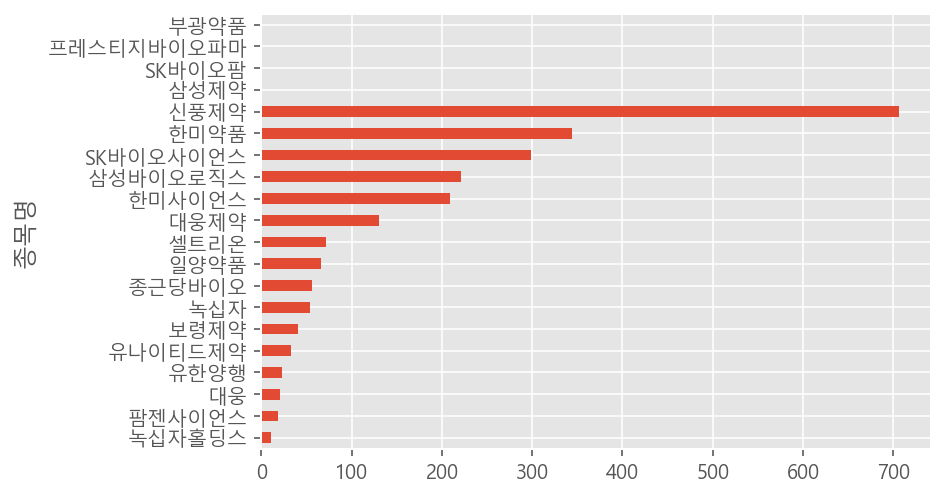

In [98]:
kospi_20_per_low = kospi_20.sort_values("PER(배)")
kospi_20_per_low.set_index("종목명")["PER(배)"].plot.barh()

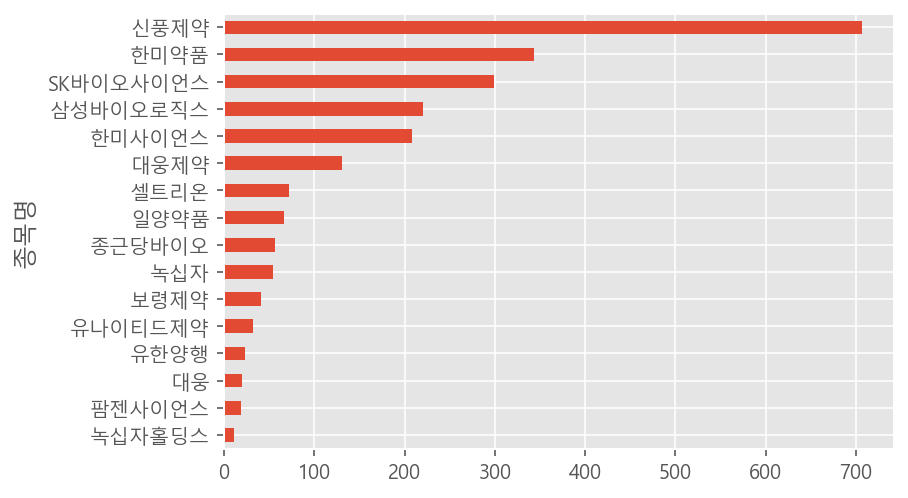

In [100]:
# 결측치 배고
kospi_20_per_low = kospi_20[kospi_20["PER(배)"] > 0].sort_values("PER(배)")
kospi_20_per_low.set_index("종목명")["PER(배)"].plot.barh()

# 전체 변수에 대한 상관계수

In [101]:
kospi_corr = df.corr()

## 상관계수 시각화

In [107]:
mask = np.triu(np.ones_like(kospi_corr))

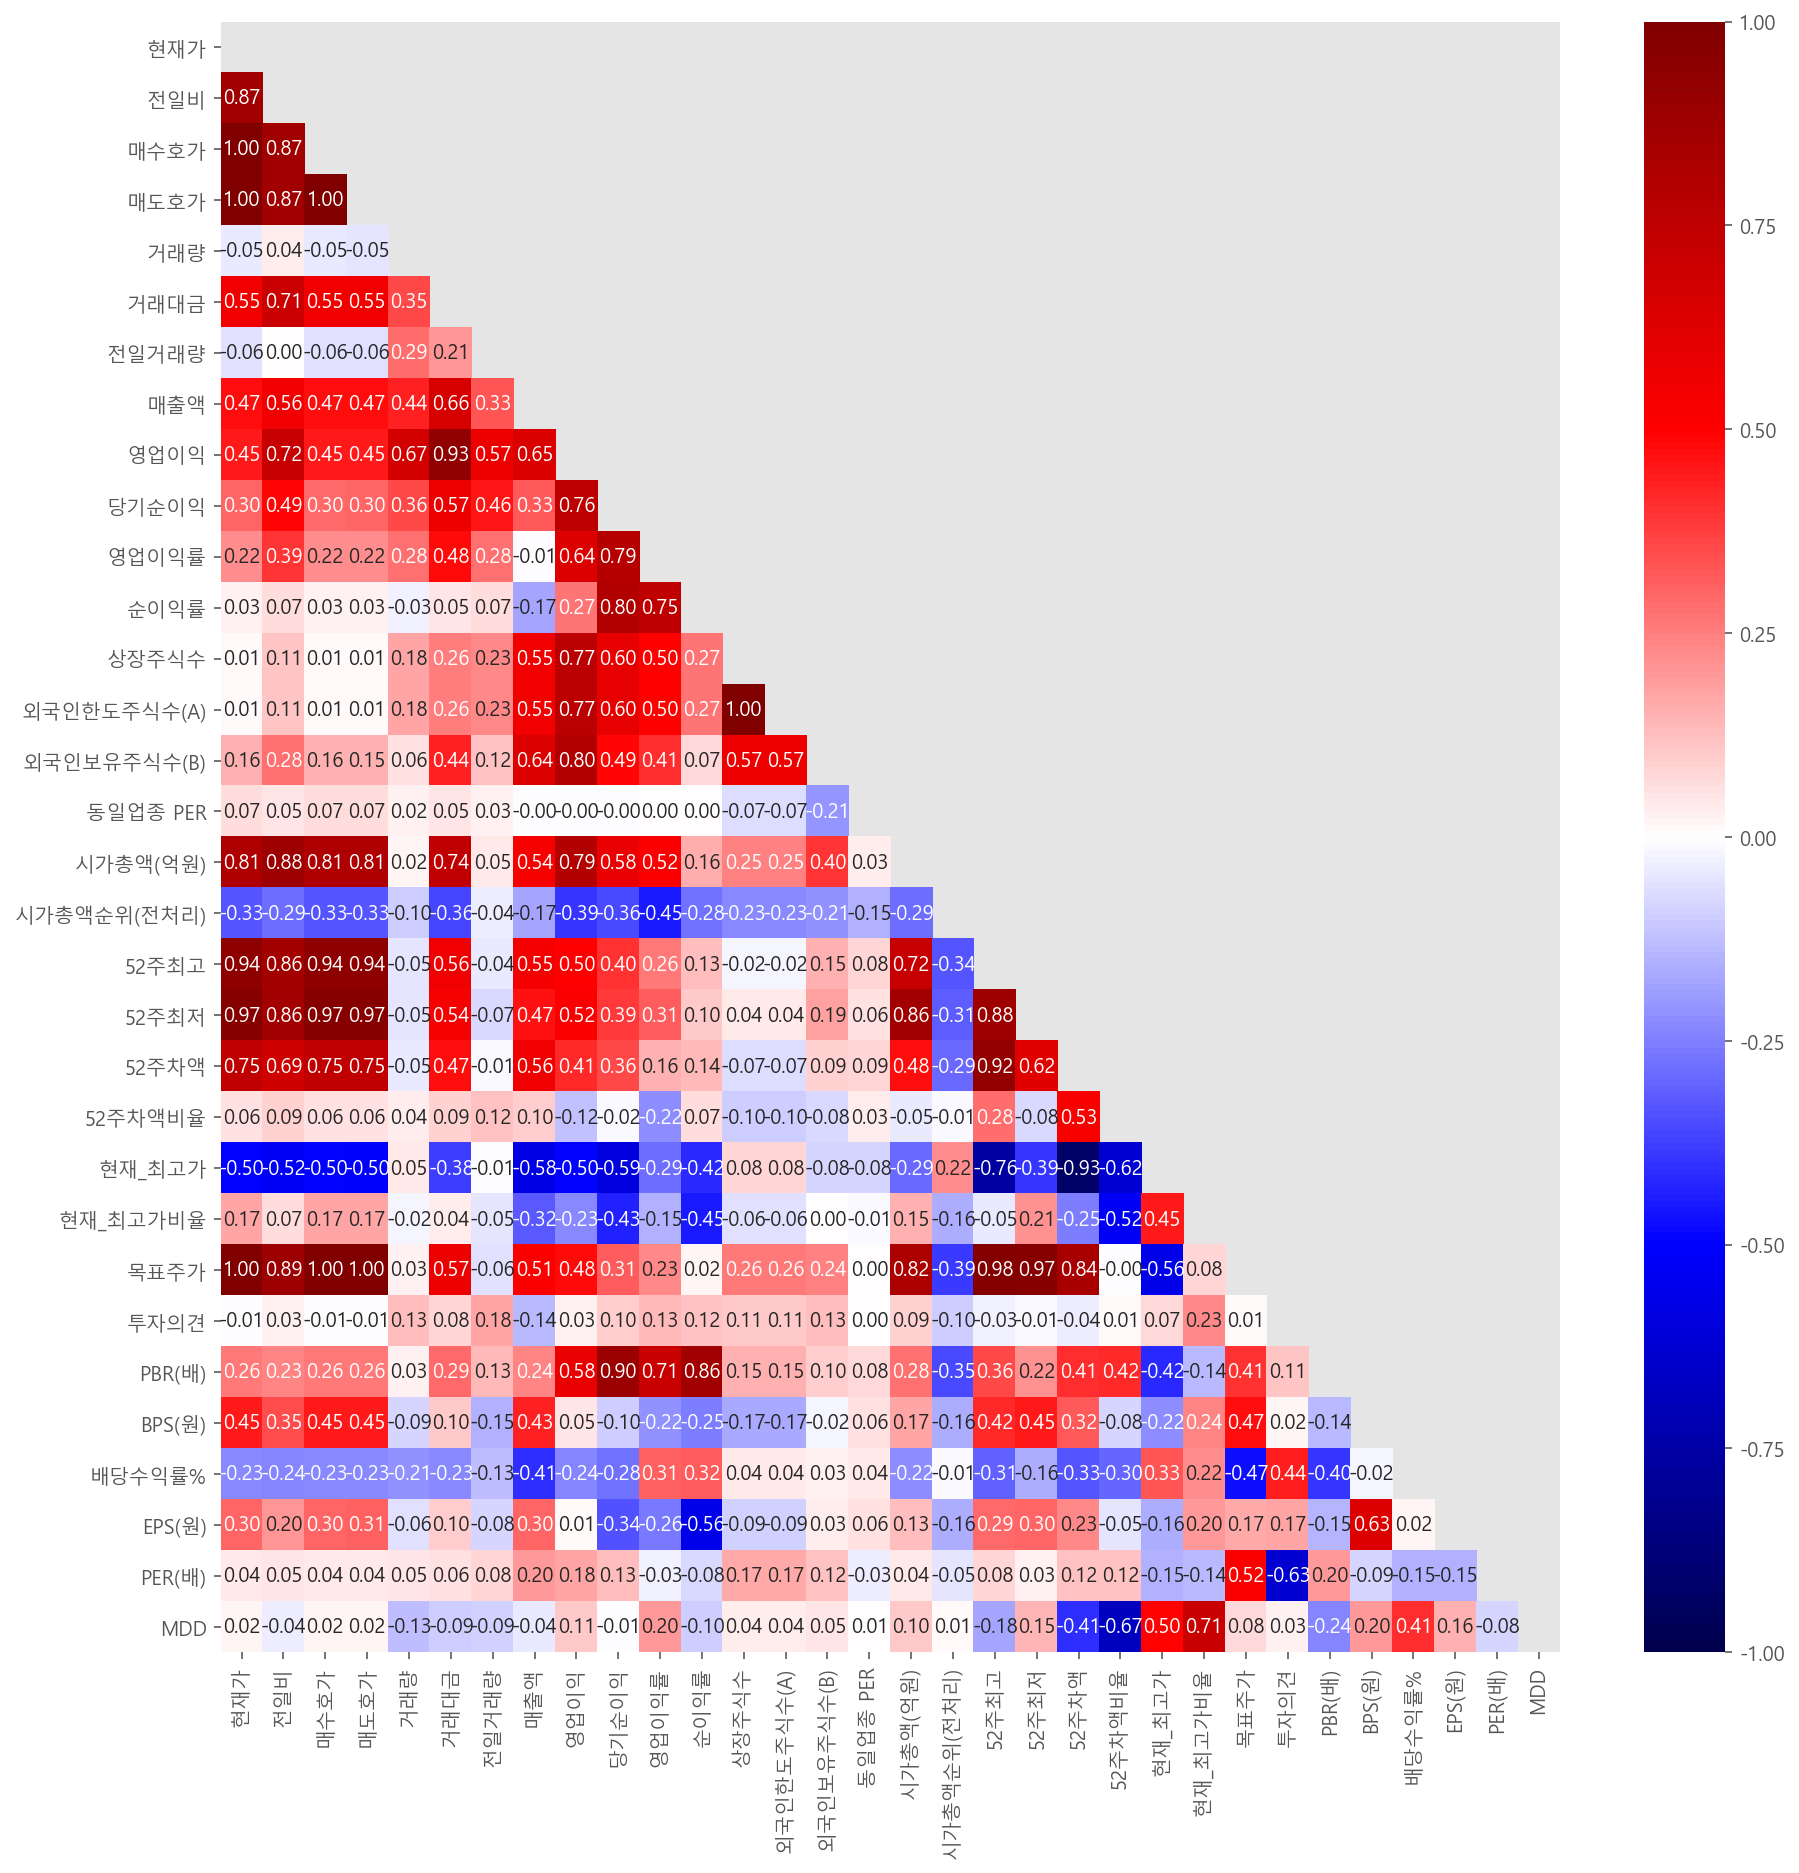

In [111]:
plt.figure(figsize=(15,15))
sns.heatmap(kospi_corr, mask=mask, fmt=".2f",annot=True, cmap="seismic", vmin=-1, vmax=1)

# 종목 별 상관계수

In [114]:
# 수치형 데이터만 추출
df_nums = df.select_dtypes(exclude=object).copy() 

In [115]:
df_nums["종목명"] = df["종목명"]

In [119]:
df_item = df_nums.set_index("종목명").T

In [120]:
df_item_corr = df_item.corr()

In [121]:
df_item_corr

종목명,삼성제약,신풍제약우,셀트리온,대웅제약,한미사이언스,셀트리온헬스케어 *,지엘팜텍 *,엔지켐생명과학 *,대웅,일양약품우,일성신약,셀트리온제약 *,뉴트리 *,에스텍파마 *,신신제약 *,동구바이오제약 *,코오롱생명과학 *,유나이티드제약,삼성바이오로직스,제일약품,명문제약,종근당,프레스티지바이오로직스 *,화일약품 *,영진약품,환인제약,압타바이오 *,테라젠이텍스 *,네오이뮨텍(Reg.S) *,신풍제약,녹십자,대성미생물 *,녹십자홀딩스,삼천당제약 *,동국제약 *,티움바이오 *,삼아제약 *,지트리비앤티 *,JW중외제약2우B,안국약품 *,KPX생명과학 *,SK바이오팜,진바이오텍 *,국전약품 *,큐브앤컴퍼니 *,동화약품,부광약품,광동제약,아미노로직스 *,한올바이오파마,한국파마 *,프레스티지바이오파마,에이프로젠 H&G *,대원제약,경동제약 *,유한양행,종근당홀딩스,일동홀딩스,신일제약 *,대봉엘에스 *,디에이치피코리아 *,에이프로젠제약,JW중외제약우,동아쏘시오홀딩스,이연제약,경보제약,브릿지바이오테라퓨틱스 *,유유제약,종근당바이오,바이넥스 *,유한양행우,팜스빌 *,일동제약,서울제약 *,하나제약,동아에스티,조아제약 *,녹십자웰빙 *,노바렉스 *,CMG제약 *,넥스트BT *,에스티팜 *,제일파마홀딩스,JW신약 *,현대약품,씨케이에이치 *,위더스제약 *,녹십자홀딩스2우,고려제약 *,한미약품,동성제약,파마리서치 *,국제약품,JW홀딩스,JW중외제약,유유제약2우B,에이치엘비제약 *,SK바이오사이언스,에이치엘사이언스 *,지놈앤컴퍼니 *,우진비앤지 *,에스씨엠생명과학 *,콜마비앤에이치 *,유유제약1우,코스맥스비티아이,씨티씨바이오 *,안트로젠 *,에이치엘비생명과학 *,내츄럴엔도텍 *,JW생명과학,메드팩토 *,비피도 *,카이노스메드 *,더블유에스아이 *,휴온스 *,진양제약 *,중앙백신 *,하이텍팜 *,드림씨아이에스 *,퓨쳐켐 *,삼진제약,대화제약 *,경남제약 *,비씨월드제약 *,이글벳 *,알리코제약 *,대한뉴팜 *,삼일제약,대한약품 *,일양약품,코미팜 *,휴온스글로벌 *,한독,바이온 *,휴메딕스 *,옵티팜 *,제일바이오 *,보령제약,박셀바이오 *,한국유니온제약 *,코스맥스엔비티 *,이수앱지스 *,팜젠사이언스
종목명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
삼성제약,1.000000,0.966600,0.969245,0.979263,0.976463,0.972448,0.977927,0.978265,0.978247,0.890678,0.971652,0.975812,0.976904,0.980923,0.976929,0.977663,0.976385,0.976768,0.974401,0.976514,0.976873,0.975072,0.979719,0.977221,0.976602,0.974490,0.976997,0.977479,0.976412,0.978347,0.970104,0.976492,0.976829,0.989297,0.968691,0.976088,0.975729,0.975758,0.323705,0.976212,0.984256,0.975679,0.978487,0.975943,0.978232,0.976616,0.976696,0.967303,0.991647,0.976181,0.977507,0.889031,0.976394,0.970825,0.975849,0.970012,0.973397,0.976156,0.976113,0.976214,0.976535,0.976192,0.757079,0.973073,0.976628,0.976855,0.976214,0.979634,0.980942,0.982640,0.970139,0.976003,0.976133,0.976093,0.976056,0.967705,0.976320,0.976094,0.976439,0.976275,0.976226,0.978386,0.974902,0.976263,0.976742,0.961671,0.976064,0.898121,0.976465,0.972105,0.976265,0.975464,0.976459,0.976139,0.976080,0.953814,0.976818,0.976951,0.975899,0.976168,0.975277,0.975936,0.976358,0.985381,0.975879,0.976203,0.974498,0.977648,0.975713,0.976662,0.976858,0.976317,0.976375,0.975896,0.973342,0.976233,0.976928,0.937587,0.975608,0.977141,0.971830,0.976292,0.976793,0.976324,0.928204,0.976816,0.976346,0.976731,0.970199,0.977969,0.976218,0.982924,0.976589,0.976728,0.979128,0.976194,0.972365,0.977490,0.975886,0.976706,0.979640,0.985977,0.987495
신풍제약우,0.966600,1.000000,0.978021,0.992082,0.989679,0.981818,0.989646,0.987928,0.989270,0.963295,0.991367,0.988238,0.989954,0.989491,0.989724,0.989690,0.990008,0.989154,0.987894,0.990537,0.989644,0.990689,0.989593,0.989628,0.988991,0.984862,0.990603,0.989284,0.987691,0.985919,0.985366,0.990037,0.988786,0.986015,0.978353,0.989794,0.990021,0.987143,0.481389,0.989311,0.988971,0.988303,0.989369,0.989688,0.989632,0.989447,0.988774,0.976375,0.985510,0.988411,0.990938,0.889013,0.989519,0.981024,0.987950,0.980066,0.989999,0.989590,0.990377,0.989585,0.988504,0.989034,0.866377,0.988239,0.989840,0.989684,0.989695,0.989445,0.991924,0.986888,0.995103,0.989842,0.989040,0.989584,0.989749,0.979064,0.989573,0.989700,0.990239,0.988146,0.988723,0.990481,0.986959,0.989527,0.989660,0.969494,0.990243,0.970482,0.988659,0.988483,0.988540,0.988275,0.989613,0.989211,0.988732,0.996664,0.989760,0.989614,0.990807,0.990602,0.986677,0.988394,0.989675,0.989610,0.989090,0.989502,0.986178,0.988056,0.989245,0.989063,0.989331,0.989725,0.989023,0.989655,0.980634,0.989596,0.989638,0.943033,0.989133,0.989837,0.982566,0.989352,0.989642,0.989995,0.939665,0.989757,0.989789,0.989577,0.981119,0.987714,0.989080,0.987338,0.989719,0.989423,0.989315,0.989893,0.984689,0.988635,0.989284,0.986314,0.989258,0.988081,0.986327
셀트리온,0.969245,0.978021,1.000000,0.992733,0.990669,0.999594,0.989026,0.997120,0.992769,0.902238,0.987473,0.996363,0.990930,0.990736,0.989681,0.989706,0.990450,0.995013,0.996898,0.991542,0.989738,0.995662,

In [122]:
# 삼성바이오로직스와 상관계수가 높은 종목
df_item_corr["삼성바이오로직스"].sort_values(ascending=False).head(10)

종목명
삼성바이오로직스          1.000000
제일파마홀딩스           0.999888
파마리서치 *           0.999887
셀트리온제약 *          0.999886
지트리비앤티 *          0.999810
종근당               0.999790
에스씨엠생명과학 *        0.999782
안트로젠 *            0.999726
네오이뮨텍(Reg.S) *    0.999714
동아쏘시오홀딩스          0.999697
Name: 삼성바이오로직스, dtype: float64